In [1893]:
import pandas as pd
import certifi
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as px
import math

from dotdict import dotdict
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [1894]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
x = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [1895]:
#Preview dataset 
df= pd.concat([x,y],axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1896]:
#Save dataset as dataset under folder Data
df.to_csv("Data\dataset.csv")

In [1897]:
#Load dataset
df = pd.read_csv('Data/dataset.csv')

In [1898]:
#Randomize data to prevent any bias in data
df = df.sample(frac=1).reset_index(drop=True)

In [1899]:
#Preview dataset after randomizing
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,10383,33,Private,203488,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,2746,57,Private,296152,Some-college,10,Divorced,Exec-managerial,Other-relative,White,Female,594,0,10,United-States,<=50K
2,38177,59,Private,750972,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K.
3,44043,38,Private,149347,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K.
4,37442,40,Private,122215,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K.


In [1900]:
# Drop the 'Unnamed: 0' column in-place
df.drop(columns=['Unnamed: 0'], inplace=True)

In [1901]:
#Prewiew dataset after dropping column
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Private,203488,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,57,Private,296152,Some-college,10,Divorced,Exec-managerial,Other-relative,White,Female,594,0,10,United-States,<=50K
2,59,Private,750972,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K.
3,38,Private,149347,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K.
4,40,Private,122215,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K.


In [1902]:
#Check unique values
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [1903]:
#Preview unique values in each column
for column in df:
    print(column)
    print(df[column].unique())
    print('\n')

age
[33 57 59 38 40 32 41 34 61 36 51 48 45 29 17 67 42 70 28 20 31 63 35 46
 79 58 52 26 25 47 30 37 72 23 19 54 18 21 44 49 43 24 55 64 39 53 73 60
 56 50 22 27 62 68 69 66 74 76 65 85 78 71 77 75 84 90 82 87 81 83 80 88
 89 86]


workclass
['Private' '?' 'State-gov' 'Self-emp-not-inc' 'Local-gov' 'Self-emp-inc'
 nan 'Federal-gov' 'Never-worked' 'Without-pay']


fnlwgt
[203488 296152 750972 ... 216636 328167 348802]


education
['Some-college' 'HS-grad' 'Assoc-acdm' 'Assoc-voc' 'Prof-school'
 'Bachelors' 'Masters' '10th' 'Doctorate' '11th' '9th' '7th-8th' '12th'
 '5th-6th' '1st-4th' 'Preschool']


education-num
[10  9 12 11 15 13 14  6 16  7  5  4  8  3  2  1]


marital-status
['Divorced' 'Married-civ-spouse' 'Never-married' 'Separated' 'Widowed'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation
['Sales' 'Exec-managerial' 'Machine-op-inspct' 'Craft-repair'
 'Handlers-cleaners' 'Other-service' 'Prof-specialty' '?' 'Tech-support'
 'Adm-clerical' 'Transport-moving' 'Protective-

In [1904]:
#In the income column <=50K and <=50K. are considered as 2 unique values.Similarly >50K and >50K.are considered as 2 unique values. This should be handled.

In [1905]:
df['income']=df['income'].replace({'<=50K.':'<=50K','>50K.':'>50K'})

In [1906]:
#Check if income was handled
print(df['income'].unique())

['<=50K' '>50K']


In [1907]:
#Checking for '?' in all columns
for column in df.columns:
    if df[column].dtype == 'object':  # Only check string columns
        if (df[column] == '?').any():
            print(f"'?' found in column {column}")


'?' found in column workclass
'?' found in column occupation
'?' found in column native-country


In [1908]:
# Replace '?' with NaN
df = df.replace('?', np.nan)

In [1909]:
#Checking for null values within the dataset
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [1910]:
#Null values present is columns workclass, occupation, native-country. Since the ratio of null data to valid data is significant and 3620 rows contain Nan values, its chosen to replace null values by the relevant mode.

In [1911]:
#Handling Null values

# Create a boolean mask for categorical columns
categorical_feature_mask = df.dtypes==object

# Get list of categorical column names
categorical_columns = df.columns[categorical_feature_mask].tolist()




In [1912]:
#Since the prediction is based on the income,its prefered to split the data according to the income and fill Nan with mode respectively for each dataframe.

In [1913]:
# Split the data into two DataFrames based on income
df_low_income = df[df['income'] == '<=50K']
df_high_income = df[df['income'] == '>50K']

In [1914]:
#Preview each dataframe that was split
df_high_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
3,38,Private,149347,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4,40,Private,122215,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
5,32,Private,116539,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
9,36,Private,247558,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,5178,0,60,NaN,>50K
11,48,Private,85384,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,40,United-States,>50K


In [1915]:
df_low_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Private,203488,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,57,Private,296152,Some-college,10,Divorced,Exec-managerial,Other-relative,White,Female,594,0,10,United-States,<=50K
2,59,Private,750972,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
6,41,Private,29591,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,0,0,42,United-States,<=50K
7,34,Private,193285,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K


In [1916]:
#Filter the workclass column based on the income.
higher_workclass = df_high_income['workclass'].value_counts()
lower_workclass = df_low_income['workclass'].value_counts()

In [1917]:
higher_workclass

workclass
Private             7387
Self-emp-not-inc    1077
Self-emp-inc         938
Local-gov            927
Federal-gov          561
State-gov            530
Without-pay            2
Name: count, dtype: int64

In [1918]:
lower_workclass

workclass
Private             26519
Self-emp-not-inc     2785
Local-gov            2209
State-gov            1451
Federal-gov           871
Self-emp-inc          757
Without-pay            19
Never-worked           10
Name: count, dtype: int64

Text(0.5, 1.0, 'Over 50K Workclass')

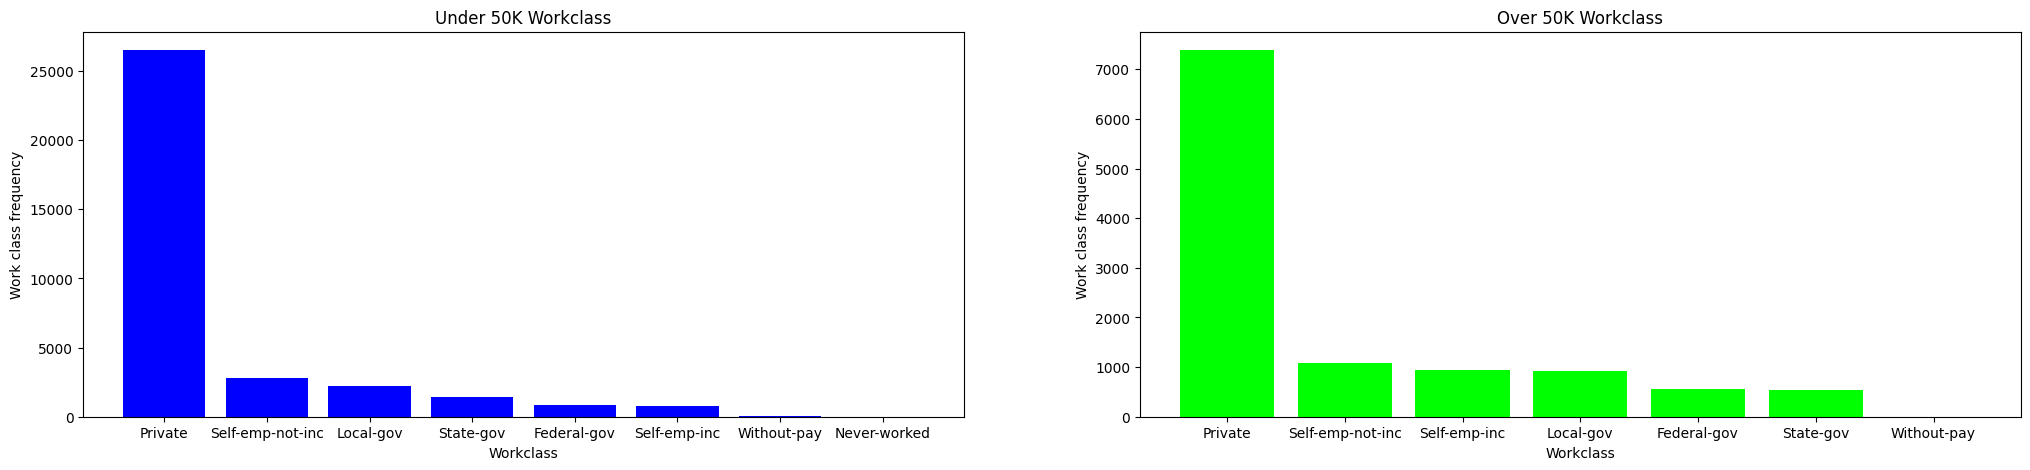

In [1919]:
#Plotting the work class based on the income 
# Under 50K plot

fig,(axis1,axis2)=plot.subplots(1,2,figsize=(25,5))
axis1.bar(lower_workclass.index,lower_workclass.values,color=['#0000FF'])
axis1.set_xlabel("Workclass")
axis1.set_ylabel("Work class frequency")
axis1.set_title("Under 50K Workclass")

#Over 50K plot
axis2.bar(higher_workclass.index,higher_workclass.values,color=['#00FF00'])
axis2.set_xlabel("Workclass")
axis2.set_ylabel("Work class frequency")
axis2.set_title("Over 50K Workclass")

In [1920]:
# Calculate mode for each income category
mode_low_income = df.loc[df['income'] == '<=50K', 'workclass'].mode()[0]
mode_high_income = df.loc[df['income'] == '>50K', 'workclass'].mode()[0]

#Fill NA with mode for workclass column in each income category
df.loc[df['income'] == '<=50K', 'workclass'] = df.loc[df['income'] == '<=50K', 'workclass'].fillna(mode_low_income)
df.loc[df['income'] == '>50K', 'workclass'] = df.loc[df['income'] == '>50K', 'workclass'].fillna(mode_high_income)


In [1921]:
#Checking for null values after handling Nan values for workclass
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [1922]:
#Handling occupation column null values
#Since prediction is made based on income filter the occupation column also based on income

lower_workclass_occupation = df_low_income['occupation'].value_counts()
higher_workclass_occupation = df_high_income['occupation'].value_counts()

In [1923]:
lower_workclass_occupation

occupation
Adm-clerical         4843
Craft-repair         4729
Other-service        4719
Sales                4029
Prof-specialty       3388
Exec-managerial      3178
Machine-op-inspct    2650
Handlers-cleaners    1934
Transport-moving     1874
Farming-fishing      1317
Tech-support         1026
Protective-serv       675
Priv-house-serv       239
Armed-Forces           10
Name: count, dtype: int64

In [1924]:
higher_workclass_occupation

occupation
Exec-managerial      2908
Prof-specialty       2784
Sales                1475
Craft-repair         1383
Adm-clerical          768
Transport-moving      481
Tech-support          420
Machine-op-inspct     372
Protective-serv       308
Other-service         204
Farming-fishing       173
Handlers-cleaners     138
Armed-Forces            5
Priv-house-serv         3
Name: count, dtype: int64

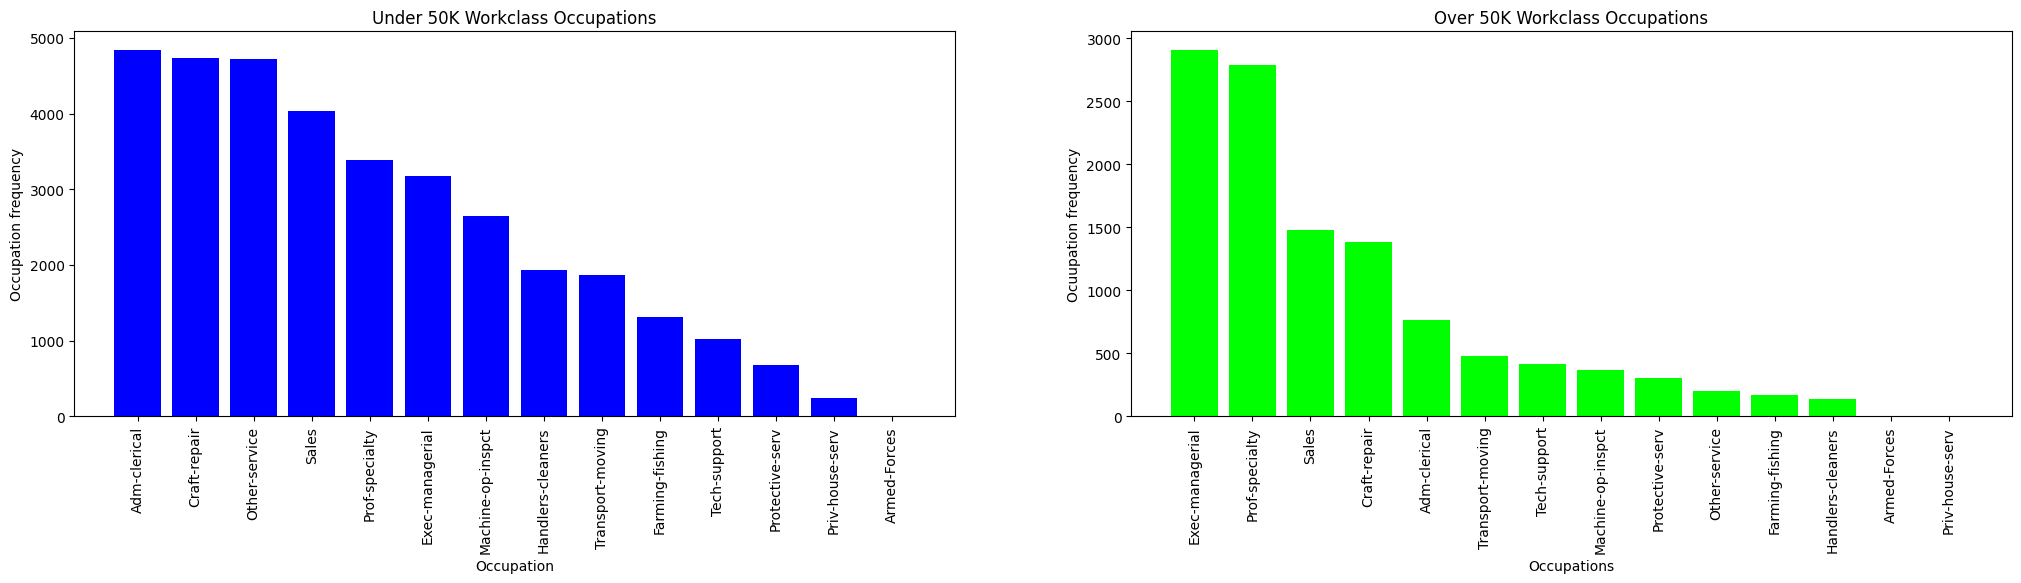

In [1925]:
#Plotting the occupations based income

# Under 50K income occupation plot

fig,(axis1,axis2)=plot.subplots(1,2,figsize=(25,5))
axis1.bar(lower_workclass_occupation.index,lower_workclass_occupation.values,color=['#0000FF'])
axis1.set_xlabel("Occupation")
axis1.set_ylabel("Occupation frequency")
axis1.set_title("Under 50K Workclass Occupations")
axis1.tick_params(axis='x',rotation=90)

#Over 50K income occupation plot
axis2.bar(higher_workclass_occupation.index,higher_workclass_occupation.values,color=['#00FF00'])
axis2.set_xlabel("Occupations")
axis2.set_ylabel("Ocuupation frequency")
axis2.set_title("Over 50K Workclass Occupations")
axis2.tick_params(axis='x',rotation=90)



In [1926]:
#Fill NA with mode for occupation column in each income category
df.loc[df['income'] == '<=50K', 'occupation'] = df.loc[df['income'] == '<=50K', 'occupation'].fillna(mode_low_income)
df.loc[df['income'] == '>50K', 'occupation'] = df.loc[df['income'] == '>50K', 'occupation'].fillna(mode_high_income)

In [1927]:
#Checking for null values after handling Nan values for occupation
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    857
income              0
dtype: int64

In [1928]:
#Handling native country column null values
#Since prediction is made based on income filter the native-country column also based on income

lower_workclass_nativecountry = df_low_income['native-country'].value_counts()
higher_workclass_nativecountry = df_high_income['native-country'].value_counts()

In [1929]:
lower_workclass_nativecountry

native-country
United-States                 33138
Mexico                          904
Philippines                     210
Puerto-Rico                     164
Germany                         148
El-Salvador                     144
Canada                          119
Cuba                            104
Dominican-Republic               98
South                            95
Jamaica                          91
India                            89
China                            86
Guatemala                        85
Columbia                         81
England                          80
Vietnam                          79
Italy                            71
Poland                           70
Haiti                            66
Japan                            60
Portugal                         55
Nicaragua                        46
Peru                             42
Taiwan                           39
Ecuador                          39
Iran                             37
Greece       

In [1930]:
higher_workclass_nativecountry

native-country
United-States                 10694
Philippines                      85
Canada                           63
India                            62
Germany                          58
Mexico                           47
England                          47
China                            36
Cuba                             34
Italy                            34
Japan                            32
Taiwan                           26
Iran                             22
South                            20
Puerto-Rico                      20
Greece                           18
Poland                           17
France                           16
Jamaica                          15
Portugal                         12
Ireland                          11
El-Salvador                      11
Cambodia                          9
Haiti                             9
Hong                              8
Yugoslavia                        8
Vietnam                           7
Hungary      

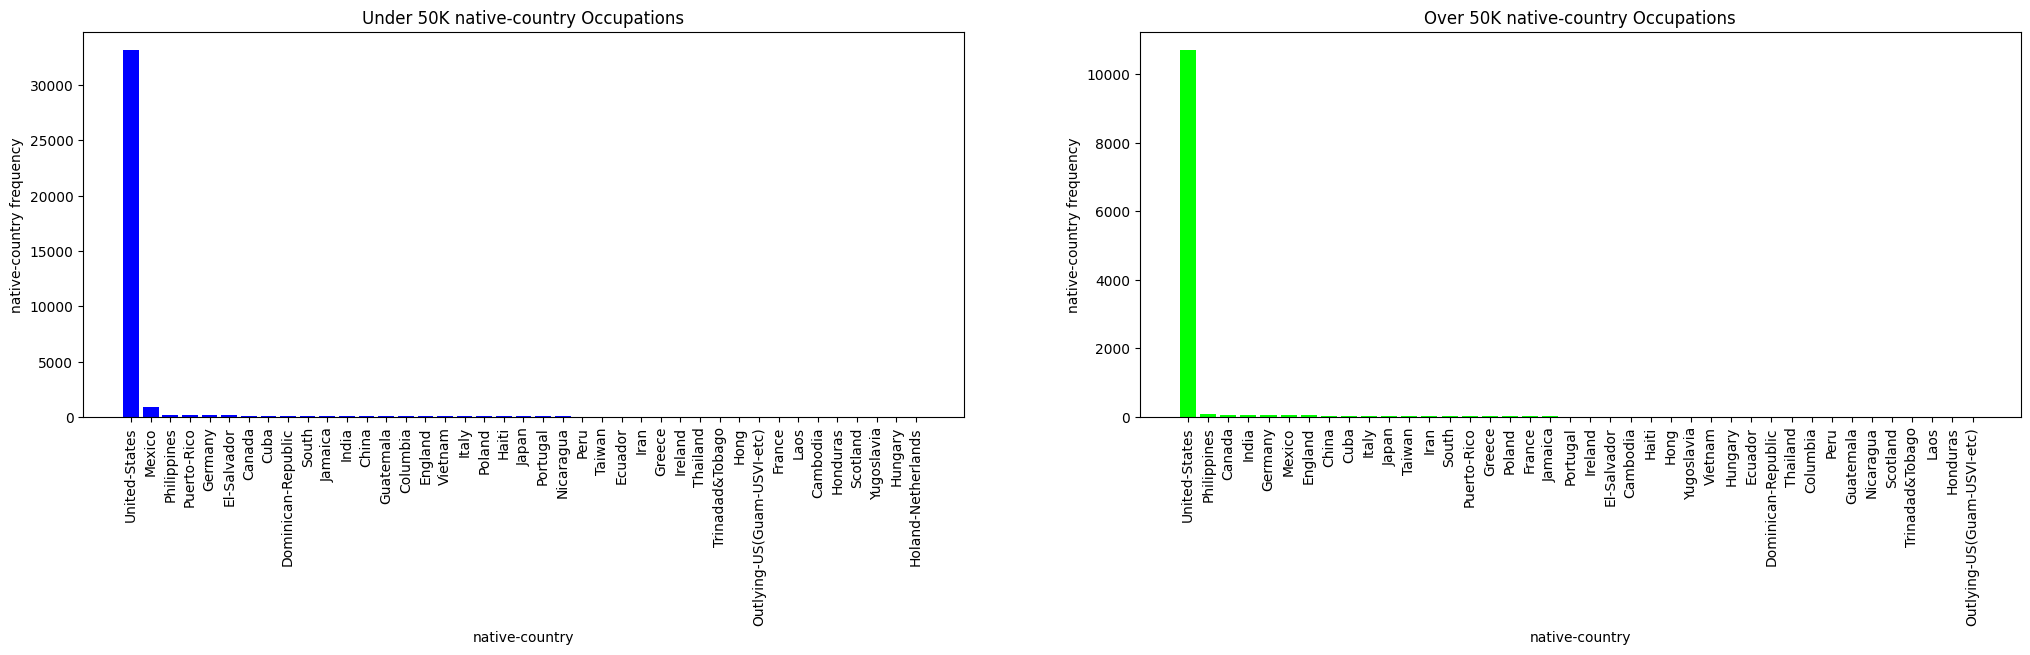

In [1931]:
#Plotting the native-country based income

# Under 50K income native-country plot

fig,(axis1,axis2)=plot.subplots(1,2,figsize=(25,5))
axis1.bar(lower_workclass_nativecountry.index,lower_workclass_nativecountry.values,color=['#0000FF'])
axis1.set_xlabel("native-country")
axis1.set_ylabel("native-country frequency")
axis1.set_title("Under 50K native-country Occupations")
axis1.tick_params(axis='x',rotation=90)

#Over 50K income native-country plot
axis2.bar(higher_workclass_nativecountry.index,higher_workclass_nativecountry.values,color=['#00FF00'])
axis2.set_xlabel("native-country")
axis2.set_ylabel("native-country frequency")
axis2.set_title("Over 50K native-country Occupations")
axis2.tick_params(axis='x',rotation=90)



In [1932]:
#Fill NA with mode for native-country column in each income category
df.loc[df['income'] == '<=50K', 'native-country'] = df.loc[df['income'] == '<=50K', 'native-country'].fillna(mode_low_income)
df.loc[df['income'] == '>50K', 'native-country'] = df.loc[df['income'] == '>50K', 'native-country'].fillna(mode_high_income)

In [1933]:
#Checking for null values after handling Nan values for native-country
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

All Nan values are handled above accordingly for null values that were available in columns in workclass, occupation and native-country columns by filling in mode respectively.

In [1934]:
#Number of Rows before handling duplicate rows
print("Number of rows before dropping duplicates:", len(df))

#Checking for duplicate rows
extra_rows = df[df.duplicated()]

#Print number of duplicate rows
print("Number of duplicate rows available:", len(extra_rows))

#Remove duplicate rows
df = df.drop_duplicates()

#Checking that duplicate rows are removed
print("Number of rows after dropping duplicates:", len(df))

Number of rows before dropping duplicates: 48842
Number of duplicate rows available: 52
Number of rows after dropping duplicates: 48790


In [1935]:
#Standerdizing data to a consistant form

#Checking for uppercase in categorical columns

categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

def check_uppercase(df, columns):
    for col in columns:
        if df[col].apply(lambda x: isinstance(x, str) and any(char.isupper() for char in x)).any():
            return True
    return False

# usage
if check_uppercase(df, categorical_columns):
    print("The DataFrame contains uppercase characters in the specified categorical columns.")

    for column in categorical_columns:
        df[column]=df[column].str.lower().str.strip()
    print("Uppercase data is handled in dataframe")


else:
    print("The DataFrame does not contain uppercase characters in the specified categorical columns.")


The DataFrame contains uppercase characters in the specified categorical columns.
Uppercase data is handled in dataframe


Feature Engineering

In [1936]:
# Check unique values in both columns education and education-num to check if the provide same data
print(df[['education', 'education-num']].drop_duplicates())

        education  education-num
0    some-college             10
2         hs-grad              9
4      assoc-acdm             12
6       assoc-voc             11
9     prof-school             15
11      bachelors             13
13        masters             14
14           10th              6
35      doctorate             16
40           11th              7
50            9th              5
53        7th-8th              4
75           12th              8
101       5th-6th              3
174       1st-4th              2
560     preschool              1


In [1937]:
#can be concluded that both data columns contains same data due to corresponding same education-num uniquely
#can drop education column

df = df.drop(columns=['education'])

In [1938]:
#Categorizing appropriate features relevant to marriage

df['marital-status'].value_counts()

marital-status
married-civ-spouse       22366
never-married            16082
divorced                  6630
separated                 1530
widowed                   1518
married-spouse-absent      627
married-af-spouse           37
Name: count, dtype: int64

In [1939]:
df['marital-status'] = df['marital-status'].replace(['married-civ-spouse','married-spouse-absent','married-af-spouse'],'married')
df['marital-status'] = df['marital-status'].replace(['separated','divorced',],'separated')
df['marital-status'] = df['marital-status'].replace(['never-married'],'single')

df['marital-status'].value_counts()

marital-status
married      23030
single       16082
separated     8160
widowed       1518
Name: count, dtype: int64

In [1940]:
#Categorize countries based on continents 
df['native-country'].value_counts()

native-country
united-states                 43792
mexico                          943
private                         856
philippines                     294
germany                         206
puerto-rico                     184
canada                          182
el-salvador                     155
india                           151
cuba                            138
england                         127
china                           122
south                           115
jamaica                         106
italy                           105
dominican-republic              103
japan                            92
poland                           87
guatemala                        86
vietnam                          86
columbia                         85
haiti                            75
portugal                         67
taiwan                           65
iran                             59
greece                           49
nicaragua                        49
peru         

In [1941]:
#Befoe categorizing as continents incorrect data can be handled. 

#Drop rows where 'native-country' is 'south' because south is not a country name
df = df[df['native-country'] != 'south']

#Assuming hong was used inplace of hongkong
#Replace 'hong' with 'hongKong' in 'native-country'
df['native-country'] = df['native-country'].replace('hong', 'hongkong')

In [1942]:
df['native-country'] = df['native-country'].replace(['united-states', 'canada', 'outlying-us(guam-usvi-etc)'], 'north america')
df['native-country'] = df['native-country'].replace(['mexico', 'el-salvador', 'cuba', 'jamaica', 'dominican-republic', 'guatemala', 'haiti', 'nicaragua', 'puerto-rico', 'trinadad&tobago', 'honduras'], 'caribbean')
df['native-country'] = df['native-country'].replace(['ecuador', 'peru', 'columbia'], 'south america')
df['native-country'] = df['native-country'].replace(['england', 'germany', 'italy', 'poland', 'portugal', 'france', 'ireland', 'yugoslavia', 'scotland', 'greece', 'hungary','holand-netherlands'], 'europe')
df['native-country'] = df['native-country'].replace(['india', 'iran', 'cambodia', 'hongkong', 'vietnam', 'laos', 'thailand', 'china', 'japan', 'taiwan','philippines'], 'asia')

df['native-country'].value_counts()

native-country
north america    43997
caribbean         1886
asia               980
private            856
europe             780
south america      176
Name: count, dtype: int64

Correlation with numeric values and income 

In [1943]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

<Axes: >

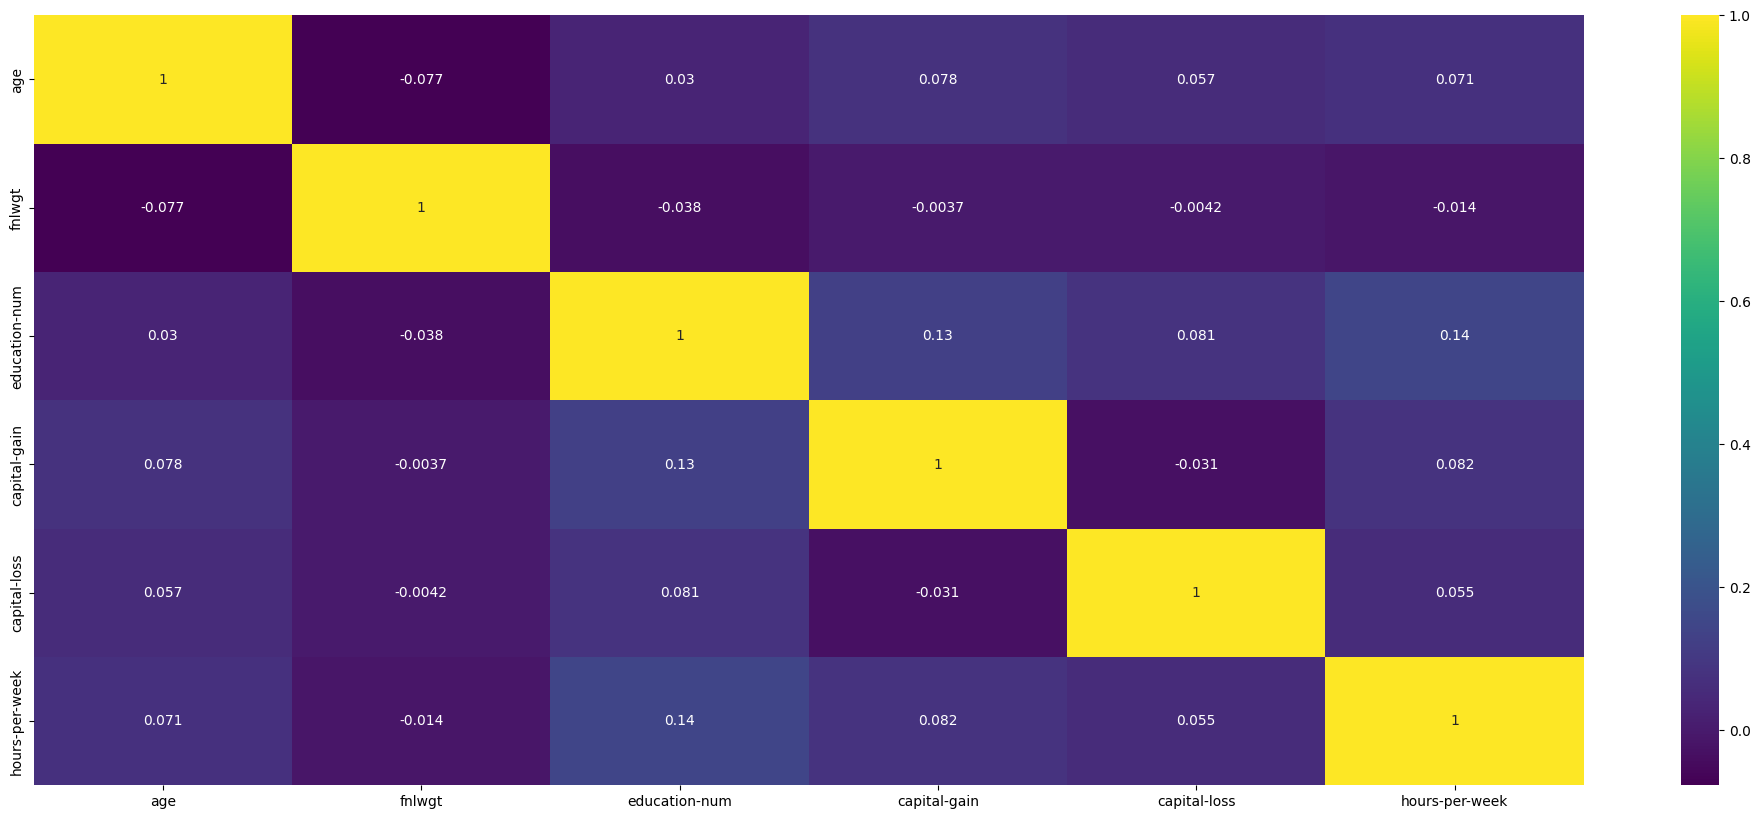

In [1944]:
#Numeric columns excluding income
numeric_data=df.select_dtypes(include=[np.number])

plot.figure(figsize = (25, 10))
sns.heatmap(numeric_data.corr(), annot=True,cmap="viridis")


In [1945]:
#convert income to binary
df['income'] = df['income'].replace('<=50K',0).replace('>50K',1)

C:\Users\HP\AppData\Local\Temp\ipykernel_27248\755639932.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [1946]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [1947]:
#numeric data including income
numeric_data=df.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns
numeric_data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076640,0.030457,0.077699,0.056984,0.071018,0.230278
fnlwgt,-0.076640,1.000000,-0.038350,-0.003709,-0.004248,-0.013557,-0.006366
education-num,0.030457,-0.038350,1.000000,0.125603,0.081033,0.144118,0.333165
capital-gain,0.077699,-0.003709,0.125603,1.000000,-0.031447,0.081766,0.223071
capital-loss,0.056984,-0.004248,0.081033,-0.031447,1.000000,0.054597,0.147394
hours-per-week,0.071018,-0.013557,0.144118,0.081766,0.054597,1.000000,0.227800
income,0.230278,-0.006366,0.333165,0.223071,0.147394,0.227800,1.000000


<Axes: >

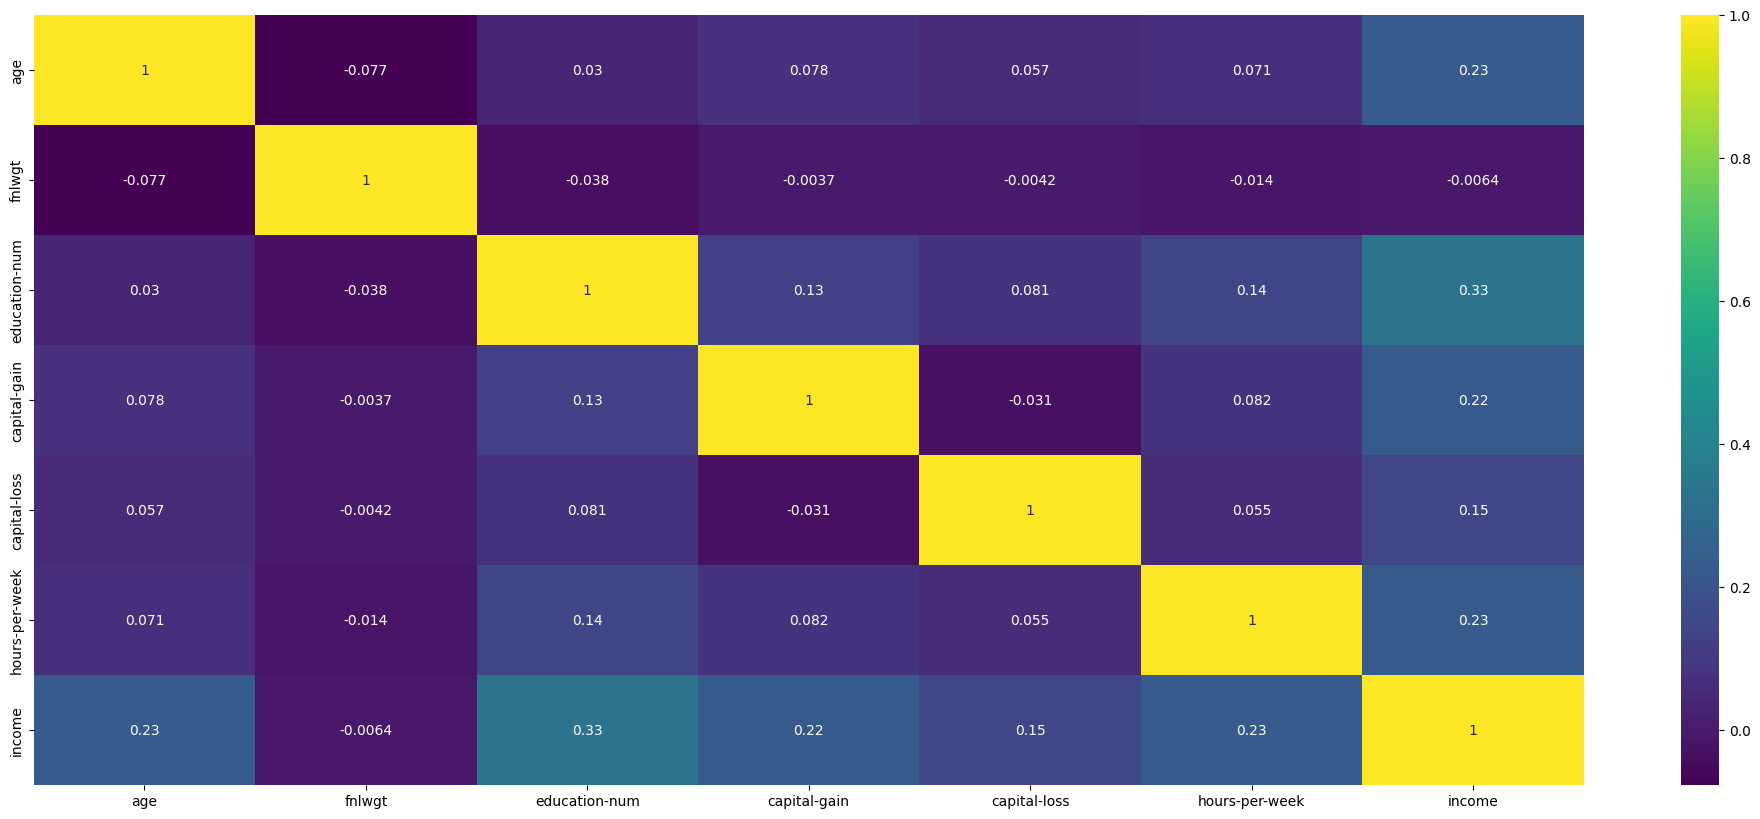

In [1948]:
plot.figure(figsize = (25, 10))
sns.heatmap(numeric_data.corr(), annot=True,cmap="viridis")

fnlwgt and income have a corelation of -0.0064 on the heatmap , there fore fnlwgt can be dropped. changes in fnlwgt do not correspond to changes in income in a consistent manner. This means it’s unlikely to provide useful information for predicting income.

In [1949]:
#removing fnlwgt column

df.drop(columns=["fnlwgt"],inplace=True)

In [1950]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,private,10,separated,sales,not-in-family,white,male,0,0,40,north america,0
1,57,private,10,separated,exec-managerial,other-relative,white,female,594,0,10,north america,0
2,59,private,9,married,machine-op-inspct,husband,white,male,0,0,40,north america,0
3,38,private,9,married,craft-repair,husband,white,male,0,0,40,north america,1
4,40,private,12,married,sales,husband,white,male,0,0,40,north america,1


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

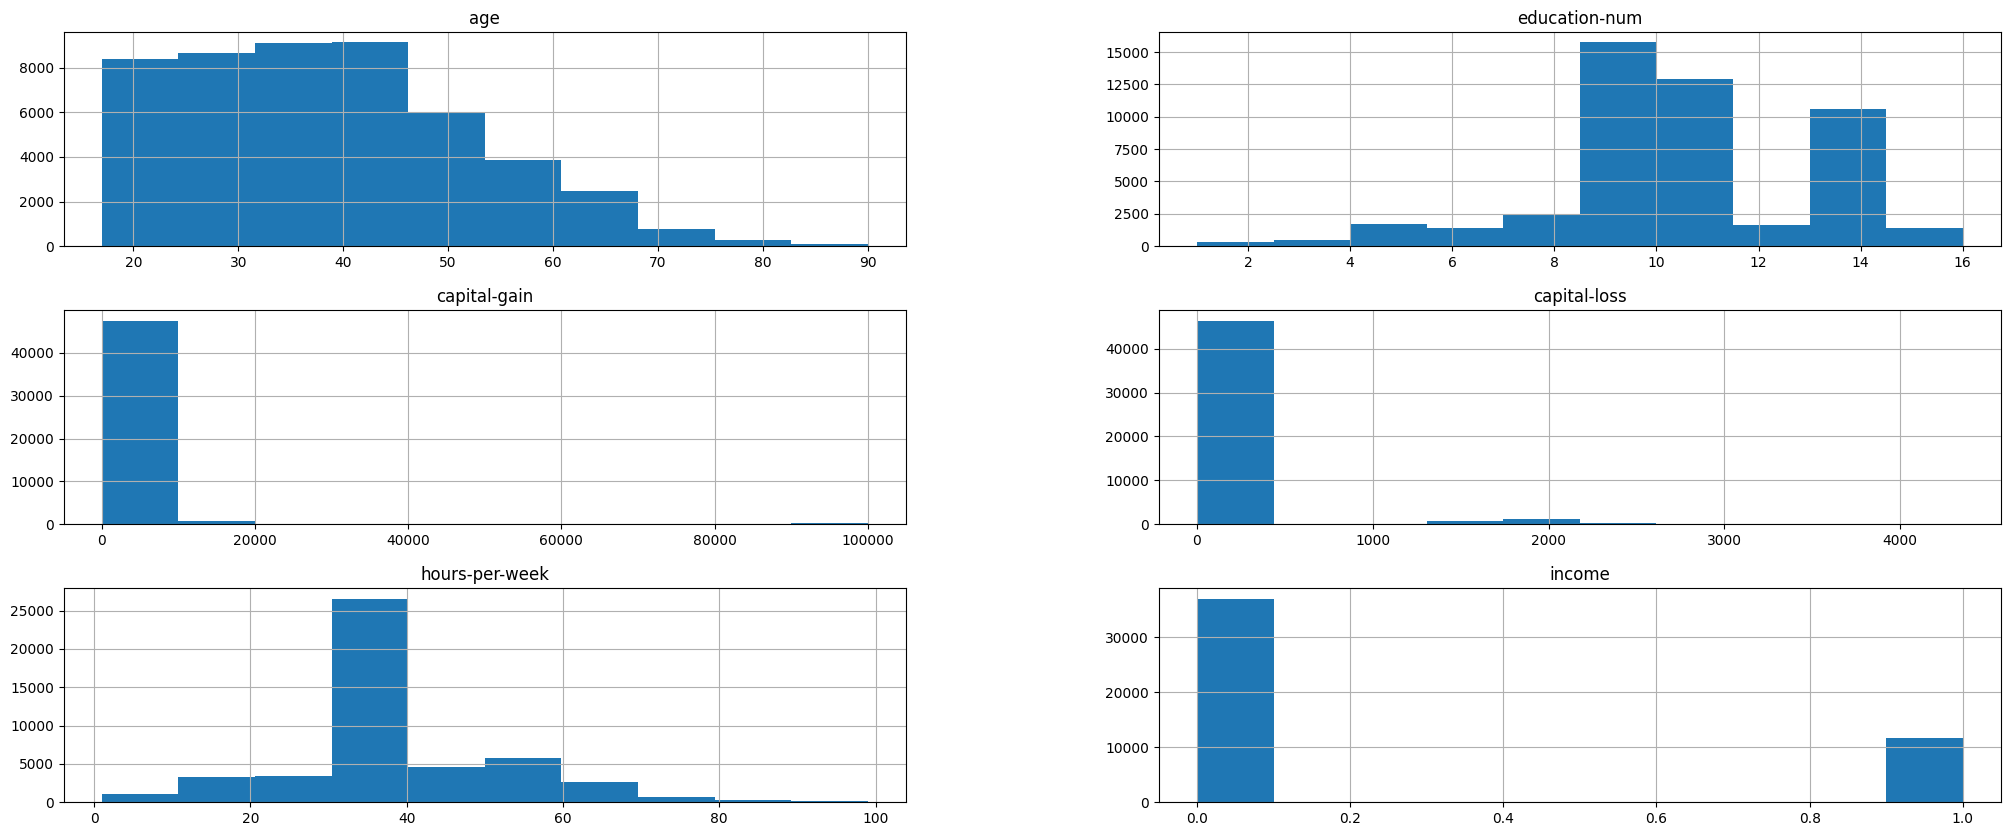

In [1951]:
#plotting histograms of numeric columns
df.hist(figsize=(25,10))

above plots give a good understanding of the outliers of each column overall

Age Outliers 

Using Inter Quartile Range method to check for outliers. here the data points are considered outliers if they fall below Q1 - 1.5 IQR or above Q3 + 1.5 IQR

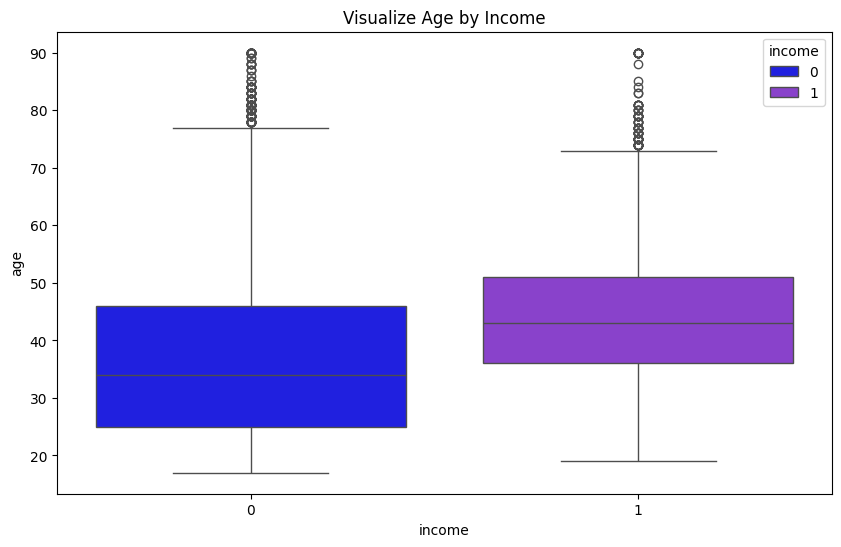

In [1952]:
#visualize age outliers in a boxplot

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['age'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize Age by Income')
plot.xlabel("income")
plot.ylabel("age")
plot.legend(title="income",loc="upper right")
plot.show()

In [1953]:
#select age data for income >50k
agehigher = df[df["income"]==1]['age']
Q1=agehigher.quantile(0.25)
Q3=agehigher.quantile(0.75)
IQR =Q3-Q1

#Upper bound
upper_bound = Q3 + 1.5 * IQR

print("upper:",upper_bound)

upper: 73.5


In [1954]:
#get count of rows where income is >50k and age is greater than upperbound

outliers_agehigher = df[(df['income']==1)& (df['age']>upper_bound)]
print("no of rows with income >50k and age > upper bound: ", len(outliers_agehigher))

no of rows with income >50k and age > upper bound:  90


Since 90 rows have outliers its prefered to cap the higher limit outliers to the upperbound

In [1955]:
df.loc[(df['income']==1) & (df['age']>upper_bound), 'age'] = int(upper_bound)

#check if higher outliers have been capped by printing all age value above upperbound
outliers_agehigher_after = df[(df['income']==1)& (df['age']>upper_bound)]
print("no of rows with income >50k and age > upper bound: ", len(outliers_agehigher_after))


no of rows with income >50k and age > upper bound:  0


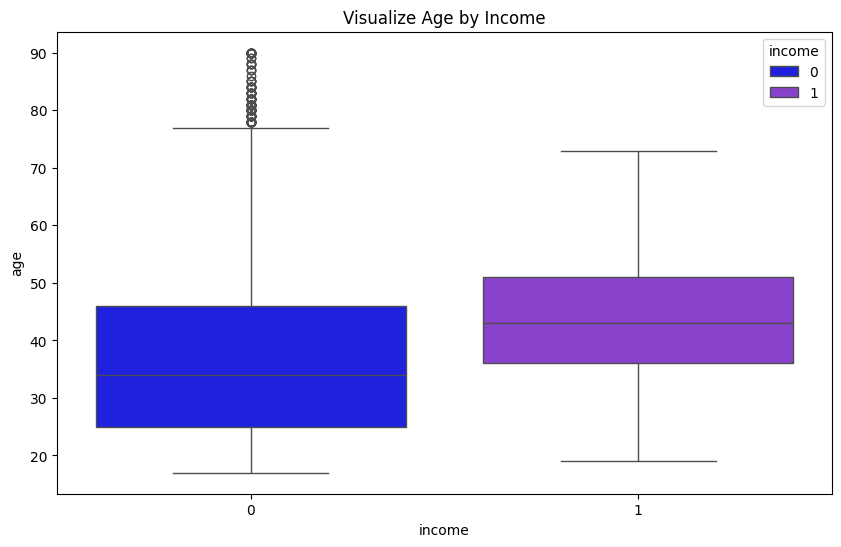

In [1956]:
#visualize age outliers in a boxplot

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['age'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize Age by Income')
plot.xlabel("income")
plot.ylabel("age")
plot.legend(title="income",loc="upper right")
plot.show()

In [1957]:
#select age data for income <=50k
agelower = df[df["income"]==0]['age']
Q1=agelower.quantile(0.25)
Q3=agelower.quantile(0.75)
IQR =Q3-Q1

#Upper bound
upper_bound = Q3 + 1.5 * IQR

print("upper:",upper_bound)

upper: 77.5


In [1958]:
#get count of rows where income is <=50k and age is greater than upperbound

outliers_agelower = df[(df['income']==0)& (df['age']>upper_bound)]
print("no of rows with income <=50k and age > upper bound: ", len(outliers_agelower))

no of rows with income <=50k and age > upper bound:  203


Since 428 rows have outliers its prefered to cap the higher limit outliers to the upperbound

In [1959]:
df.loc[(df['income']==0) & (df['age']>upper_bound), 'age'] = int(upper_bound)

#check if higher outliers have been capped by printing all age value above upperbound
outliers_agelower_after = df[(df['income']==0)& (df['age']>upper_bound)]
print("no of rows with income <=50k and age > upper bound: ", len(outliers_agelower_after))


no of rows with income <=50k and age > upper bound:  0


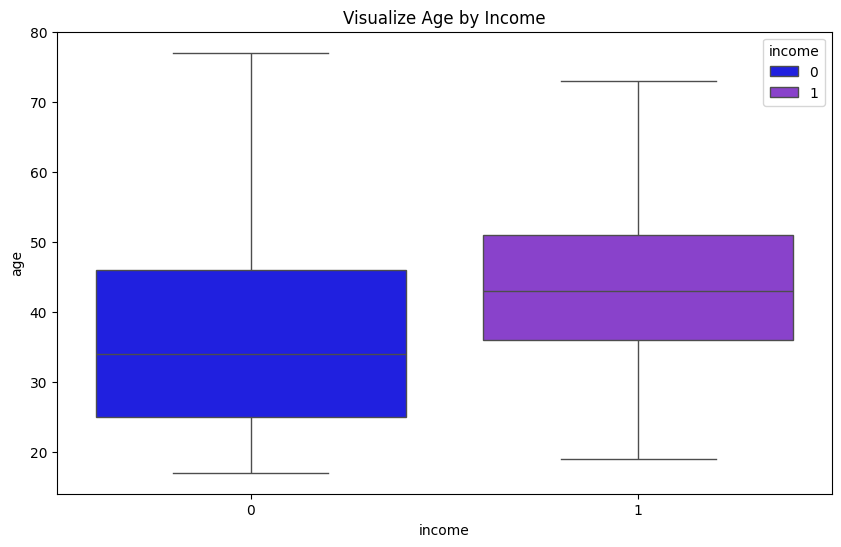

In [1960]:
#visualize age outliers in a boxplot 

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['age'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize Age by Income')
plot.xlabel("income")
plot.ylabel("age")
plot.legend(title="income",loc="upper right")
plot.show()

according to boxplot can visually represent handling of all Age outliers

Education Outliers

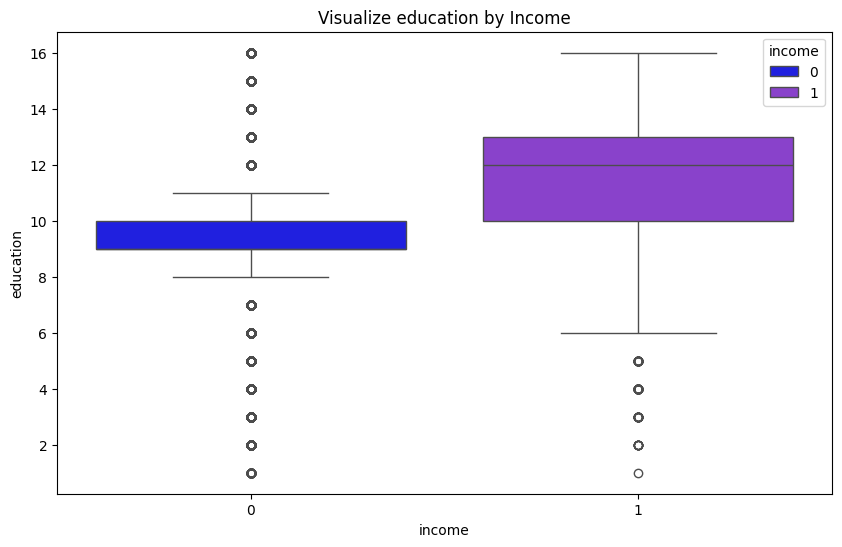

In [1961]:
#visualize education outliers in a boxplot 

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['education-num'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize education by Income')
plot.xlabel("income")
plot.ylabel("education")
plot.legend(title="income",loc="upper right")
plot.show()

In [1962]:
#select education data for income >50k
educationhigher = df[df["income"]==1]['education-num']
Q1=educationhigher.quantile(0.25)
Q3=educationhigher.quantile(0.75)
IQR =Q3-Q1

#Lower bound
lower_bound = Q1 - 1.5* IQR

print("lower:",lower_bound)

lower: 5.5


In [1963]:
#get count of rows where income is >50k and education num is less than lowerbound

outliers_eduhigher = df[(df['income']==1)& (df['education-num']<lower_bound)]
print("no of rows with income >50k and age < lower bound: ", len(outliers_eduhigher))

no of rows with income >50k and age < lower bound:  139


Since 139 rows have outliers its prefered to cap the lower limit outliers to the lowerbound

In [1964]:
df.loc[(df['income']==1) & (df['education-num']<lower_bound), 'education-num'] = math.ceil(lower_bound)

#check if higher outliers have been capped by printing all age value above upperbound
outliers_eduhigher_after = df[(df['income']==1)& (df['education-num']<lower_bound)]
print("no of rows with income >50k and education-num < lower bound: ", len(outliers_eduhigher_after))

no of rows with income >50k and education-num < lower bound:  0


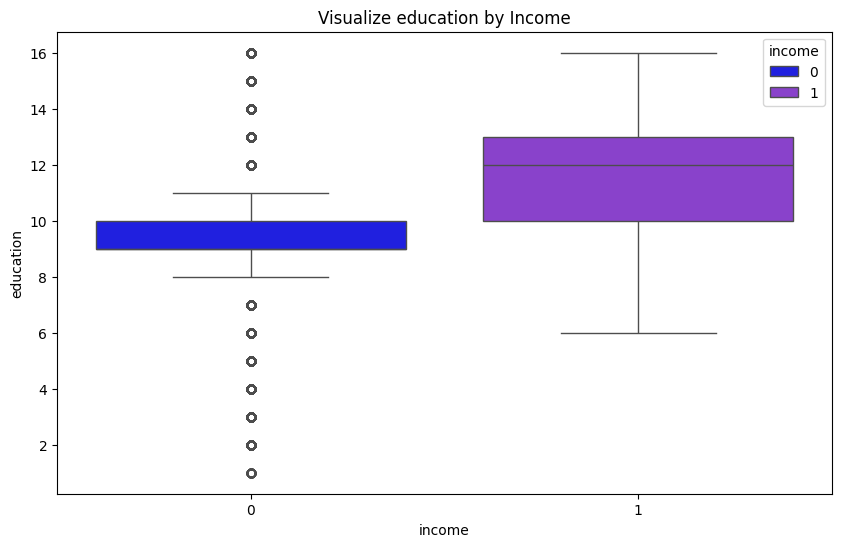

In [1965]:
#visualize education outliers in a boxplot 

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['education-num'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize education by Income')
plot.xlabel("income")
plot.ylabel("education")
plot.legend(title="income",loc="upper right")
plot.show()

In [1966]:
#select education data for income <=50k
educationlower = df[df["income"]==0]['education-num']
Q1=educationlower.quantile(0.25)
Q3=educationlower.quantile(0.75)
IQR =Q3-Q1

#Lower bound and upper bound
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

print("lower:",lower_bound)
print("upper:",upper_bound)

lower: 7.5
upper: 11.5


Upper limit outliers

In [1967]:
#get count of rows where income is <=50k and education num is higher than upperbound

outliers_edulower_up = df[(df['income']==0)& (df['education-num']>upper_bound)]
print("no of rows with income <=50k and education > upper bound: ", len(outliers_edulower_up))

no of rows with income <=50k and education > upper bound:  7435


Since 7435 rows have outliers its prefered to cap the higher limit outliers to the upperbound

In [1968]:
df.loc[(df['income']==0) & (df['education-num']>upper_bound), 'education-num'] = int(upper_bound)

#check if higher outliers have been capped by printing all age value above upperbound
outliers_edulower_up_after = df[(df['income']==0)& (df['education-num']>upper_bound)]
print("no of rows with income <=50k and education > upper bound: ", len(outliers_agelower_after))

no of rows with income <=50k and education > upper bound:  0


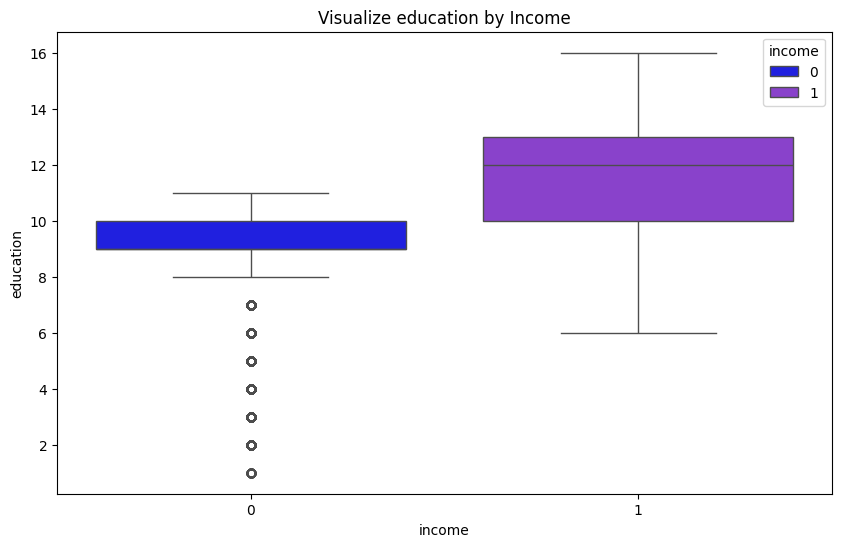

In [1969]:
#visualize education outliers in a boxplot 

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['education-num'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize education by Income')
plot.xlabel("income")
plot.ylabel("education")
plot.legend(title="income",loc="upper right")
plot.show()

Lower limit outliers

In [1970]:
#get count of rows where income is <=50k and education num is lower than lowerbound

outliers_edulower_low = df[(df['income']==0)& (df['education-num']<lower_bound)]
print("no of rows with income <=50k and education < lower bound: ", len(outliers_edulower_low))

no of rows with income <=50k and education < lower bound:  5421


Since 5421 rows have outliers its prefered to cap the lower limit outliers to the lowerbound

In [1971]:
df.loc[(df['income']==0) & (df['education-num']<lower_bound), 'education-num'] = math.ceil(lower_bound)

#check if lower outliers have been capped by printing all education value below lowerbound
outliers_edulower_low_after = df[(df['income']==0)& (df['education-num']<lower_bound)]
print("no of rows with income <=50k and education <lower_bound: ", len(outliers_edulower_low_after))

no of rows with income <=50k and education <lower_bound:  0


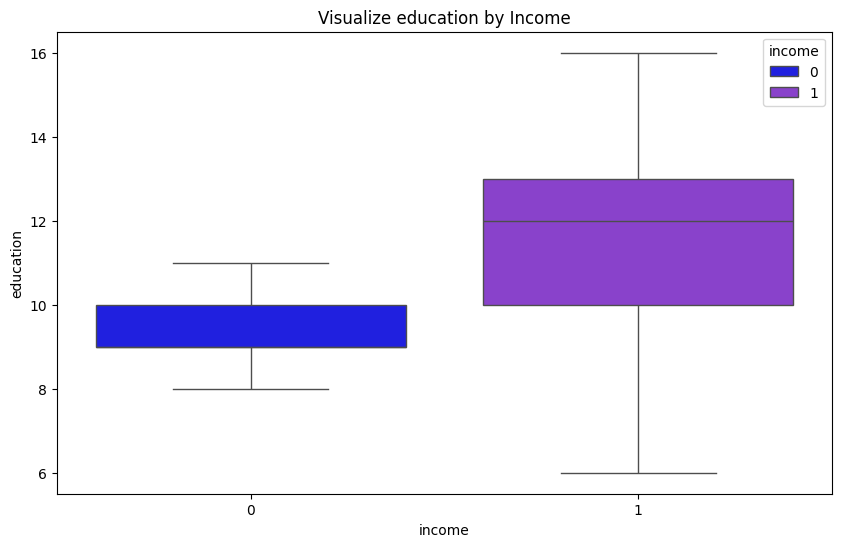

In [1972]:
#visualize education outliers in a boxplot 

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['education-num'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize education by Income')
plot.xlabel("income")
plot.ylabel("education")
plot.legend(title="income",loc="upper right")
plot.show()

capital gain outliers

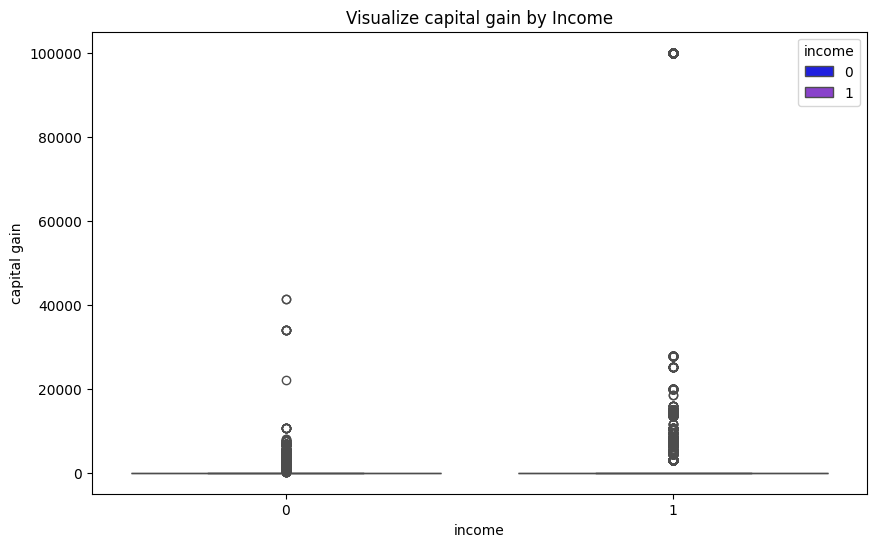

In [1978]:
#visualize capital outliers in a boxplot 

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['capital-gain'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize capital gain by Income')
plot.xlabel("income")
plot.ylabel("capital gain")
plot.legend(title="income",loc="upper right")
plot.show()

Hours per week outliers

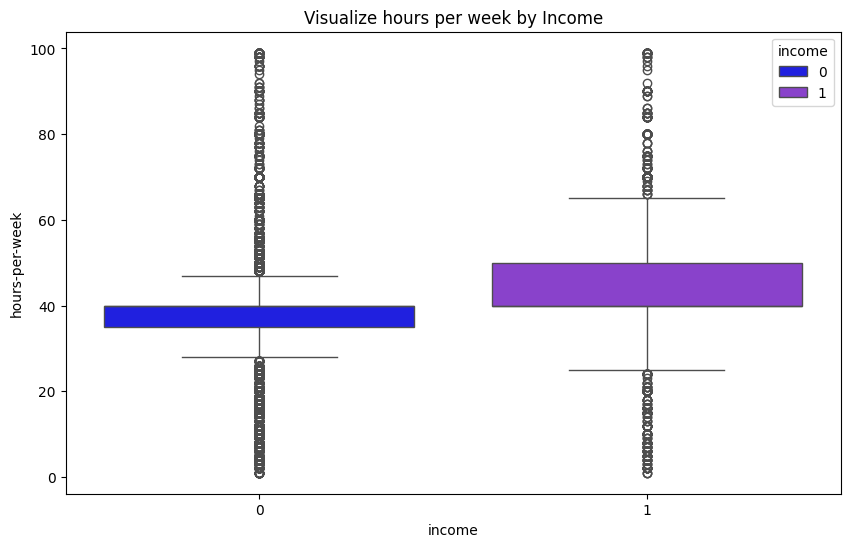

In [1980]:
#visualize hours per week outliers in a boxplot 

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['hours-per-week'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize hours per week by Income')
plot.xlabel("income")
plot.ylabel("hours-per-week")
plot.legend(title="income",loc="upper right")
plot.show()

In [1981]:
#select hours per week data for income >50k
hourshigher = df[df["income"]==1]['hours-per-week']
Q1=hourshigher.quantile(0.25)
Q3=hourshigher.quantile(0.75)
IQR =Q3-Q1

#Lower bound
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

print("lower:",lower_bound)
print("upper:", upper_bound)

lower: 25.0
upper: 65.0


In [1982]:
#get count of rows where income is >50k and hours per week is higher than upperbound

outliers_hourshigher_up = df[(df['income']==1)& (df['hours-per-week']>upper_bound)]
print("no of rows with income >50k and hours per week > upper bound: ", len(outliers_hourshigher_up))

no of rows with income >50k and hours per week > upper bound:  433


Since 433 rows have outliers its prefered to cap the upper limit outliers to the upperbound

In [1983]:
df.loc[(df['income']==1) & (df['hours-per-week']>upper_bound), 'hours-per-week'] = int(upper_bound)

#check if higher outliers have been capped by printing all age value above upperbound
outliers_hourshigher_up_after = df[(df['income']==1)& (df['hours-per-week']>upper_bound)]
print("no of rows with income >50k and hours per week > upper bound: ", len(outliers_hourshigher_up_after))

no of rows with income >50k and hours per week > upper bound:  0


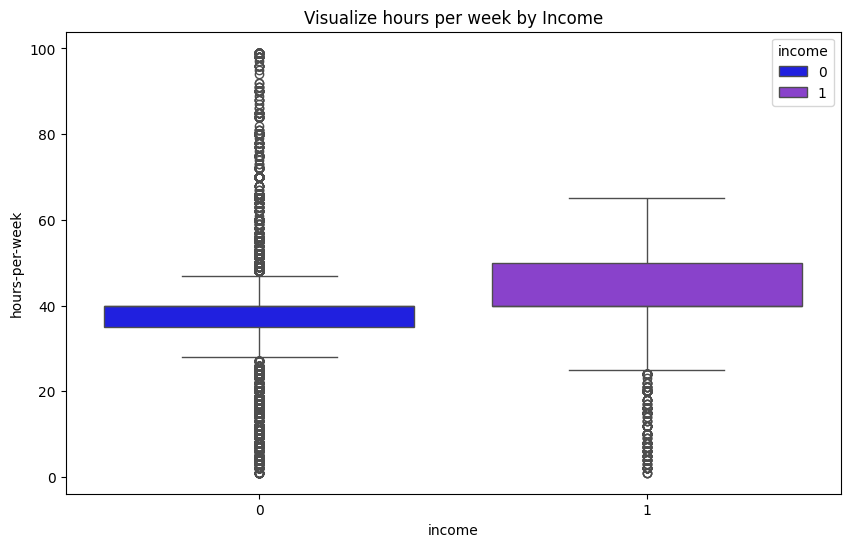

In [1984]:
#visualize hours per week outliers in a boxplot 

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['hours-per-week'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize hours per week by Income')
plot.xlabel("income")
plot.ylabel("hours-per-week")
plot.legend(title="income",loc="upper right")
plot.show()

In [ ]:
#get count of rows where income is >50k and hours per week is lower than lowerbound

outliers_hourshigher_low = df[(df['income']==1)& (df['hours-per-week']<lower_bound)]
print("no of rows with income >50k and hours per week <lower_bound: ", len(outliers_hourshigher_low))

Since 433 rows have outliers its prefered to cap the upper limit outliers to the upperbound

In [ ]:
df.loc[(df['income']==1) & (df['hours-per-week']>upper_bound), 'hours-per-week'] = int(upper_bound)

#check if higher outliers have been capped by printing all age value above upperbound
outliers_hourshigher_up_after = df[(df['income']==1)& (df['hours-per-week']>upper_bound)]
print("no of rows with income >50k and hours per week > upper bound: ", len(outliers_hourshigher_up_after))

In [ ]:
#visualize hours per week outliers in a boxplot 

plot.figure(figsize=(10,6))
sns.boxplot(x=df['income'], y=df['hours-per-week'], hue=df['income'], palette={1: '#8A2BE2', 0: 'blue'})
plot.title('Visualize hours per week by Income')
plot.xlabel("income")
plot.ylabel("hours-per-week")
plot.legend(title="income",loc="upper right")
plot.show()

In [1973]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


In [1974]:
# Encode categorical variables
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Splitting the dataset into training and testing sets
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1975]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only to avoid data leakage
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [1976]:
# Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_train_pred = nb_classifier.predict(X_train)
nb_test_pred = nb_classifier.predict(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_train_pred = rf_classifier.predict(X_train)
rf_test_pred = rf_classifier.predict(X_test)

# Calculating accuracies
nb_train_accuracy = accuracy_score(y_train, nb_train_pred)
nb_test_accuracy = accuracy_score(y_test, nb_test_pred)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

print("Naïve Bayes Classifier:")
print("Training Accuracy:", nb_train_accuracy)
print("Testing Accuracy:", nb_test_accuracy)

print("\nRandom Forest Classifier:")
print("Training Accuracy:", rf_train_accuracy)
print("Testing Accuracy:", rf_test_accuracy)

Naïve Bayes Classifier:
Training Accuracy: 0.8627118644067797
Testing Accuracy: 0.8687211093990755

Random Forest Classifier:
Training Accuracy: 0.9802773497688752
Testing Accuracy: 0.9108371854134566


In [1977]:
# Random Forest Classifier with adjusted hyperparameters
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2)
rf_classifier.fit(X_train, y_train)
rf_train_pred = rf_classifier.predict(X_train)
rf_test_pred = rf_classifier.predict(X_test)

# Calculating accuracies
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

print("Random Forest Classifier after handling overfitting:")
print("Training Accuracy:", rf_train_accuracy)
print("Testing Accuracy:", rf_test_accuracy)

Random Forest Classifier after handling overfitting:
Training Accuracy: 0.9335901386748844
Testing Accuracy: 0.9242937853107345
